In [2]:
import matplotlib.pyplot as plt
import numpy as np 

## Zad.1 

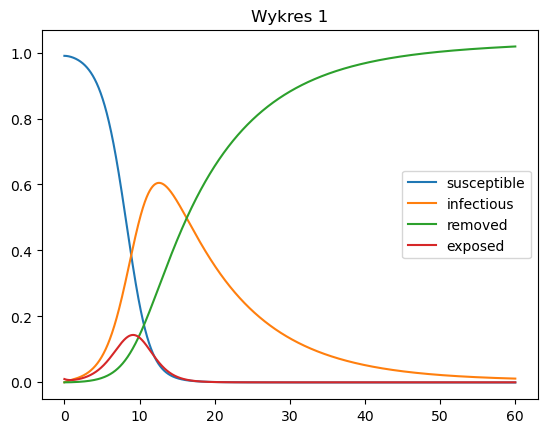

In [23]:
h = 0.001
beta = 1
sigma = 1 
gamma = 0.1

s = np.array([0.99])    #susceptible
e = np.array([0.01])    #exposed
i = np.array([0.0])     #infectious
r = np.array([0.0])     #removed

def ds(beta, s, i):
    return - beta * s * i 

def di(sigma, e, i, gamma):
    return sigma * e - (gamma * i)

def dr(gamma, i):
    return gamma * i

def de(beta, i, s, sigma, e):
    return beta * i * s - (sigma * e)


def s_rk(beta, s, i):
    f1 = h * ds(beta, s[-1], i[-1])
    f2 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f1)
    f3 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f2)
    f4 = h * ds(beta, s[-1] + h, i[-1] + f3)

    return s[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def i_rk(sigma, e, i, gamma):
    f1 = h * di(sigma, e[-1], i[-1], gamma)
    f2 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f1, gamma)
    f3 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f2, gamma)
    f4 = h * di(sigma, e[-1] + h, i[-1] + f3, gamma)

    return i[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def r_rk(gamma, i):
    f1 = h * dr(gamma, i[-1])
    f2 = h * dr(gamma, i[-1] + 1/2 * f1)
    f3 = h * dr(gamma, i[-1] + 1/2 * f2)
    f4 = h * dr(gamma, i[-1] + f3)

    return r[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def e_rk(beta, i, s, sigma, e):
    f1 = h * de(beta, i[-1], s[-1], sigma, e[-1])
    f2 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f1, sigma, e[-1] + 1/2 * f1)
    f3 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f2, sigma, e[-1] + 1/2 * f2)
    f4 = h * de(beta, i[-1] + h, s[-1] + f3, sigma, e[-1] + f3)

    return e[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


#wykres
x = np.arange(0, 60, 0.001)

for z in x:
    ns, ni, nr, ne = s_rk(beta, s, i), i_rk(sigma, e, i, gamma), r_rk(gamma, i), e_rk(beta, i, s, sigma, e)

    s = np.append(s, ns)
    i = np.append(i, ni)
    r = np.append(r, nr)
    e = np.append(e, ne)


plt.plot(x, s[:-1], label = 'susceptible')
plt.plot(x, i[:-1], label = 'infectious')
plt.plot(x, r[:-1], label = 'removed')
plt.plot(x, e[:-1], label = 'exposed')
plt.title('Wykres 1')
plt.legend()
plt.show()

## Zad. 2

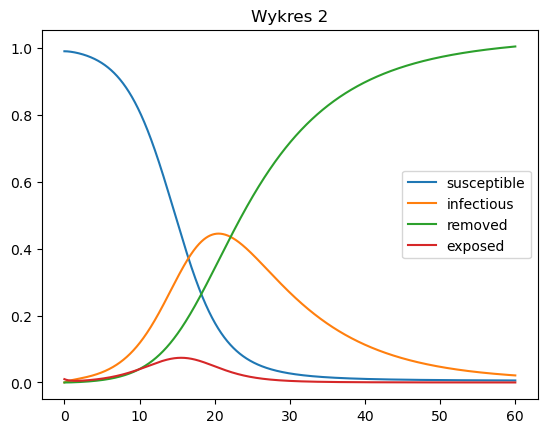

In [33]:
h = 0.001
beta = 0.5
sigma = 1 
gamma = 0.1

s = np.array([0.99])    #susceptible
e = np.array([0.01])    #exposed
i = np.array([0.0])     #infectious
r = np.array([0.0])     #removed

def ds(beta, s, i):
    return - beta * s * i 

def di(sigma, e, i, gamma):
    return sigma * e - (gamma * i)

def dr(gamma, i):
    return gamma * i

def de(beta, i, s, sigma, e):
    return beta * i * s - (sigma * e)


def s_rk(beta, s, i):
    f1 = h * ds(beta, s[-1], i[-1])
    f2 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f1)
    f3 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f2)
    f4 = h * ds(beta, s[-1] + h, i[-1] + f3)

    return s[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def i_rk(sigma, e, i, gamma):
    f1 = h * di(sigma, e[-1], i[-1], gamma)
    f2 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f1, gamma)
    f3 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f2, gamma)
    f4 = h * di(sigma, e[-1] + h, i[-1] + f3, gamma)

    return i[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def r_rk(gamma, i):
    f1 = h * dr(gamma, i[-1])
    f2 = h * dr(gamma, i[-1] + 1/2 * f1)
    f3 = h * dr(gamma, i[-1] + 1/2 * f2)
    f4 = h * dr(gamma, i[-1] + f3)

    return r[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def e_rk(beta, i, s, sigma, e):
    f1 = h * de(beta, i[-1], s[-1], sigma, e[-1])
    f2 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f1, sigma, e[-1] + 1/2 * f1)
    f3 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f2, sigma, e[-1] + 1/2 * f2)
    f4 = h * de(beta, i[-1] + h, s[-1] + f3, sigma, e[-1] + f3)

    return e[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)



#wykres
x = np.arange(0, 60, 0.001)

for z in x:
    ns, ni, nr, ne = s_rk(beta, s, i), i_rk(sigma, e, i, gamma), r_rk(gamma, i), e_rk(beta, i, s, sigma, e)

    s = np.append(s, ns)
    i = np.append(i, ni)
    r = np.append(r, nr)
    e = np.append(e, ne)


plt.plot(x, s[:-1], label = 'susceptible')
plt.plot(x, i[:-1], label = 'infectious')
plt.plot(x, r[:-1], label = 'removed')
plt.plot(x, e[:-1], label = 'exposed')
plt.title('Wykres 2')
plt.legend()
plt.show()




Zmniejszając wartość współczynnika zakażeń $\beta$ o połowę, wykres funkcji e(t) ulega spłaszczeniu; zmniejsza się wartość maksymalna ilości osób wystawionych na działanie wirusa. Maksymalna ilość zainfekowanych również spadła. Przebieg epidemi jest wolniejszy.

## Zad. 3


a) $R_0$ $\gt$ 1 

$R_0$ = $\frac{\beta}{\gamma}$ s(0)

$R_0$ = $\frac{0.5}{0.1}$ 0.99 = 4.95           (wykres 2)

b) $R_0$ $\lt$ 1

$R_0$ = $\frac{0.09}{0.1}$ 0.99 = 0.891         (wykres 3)

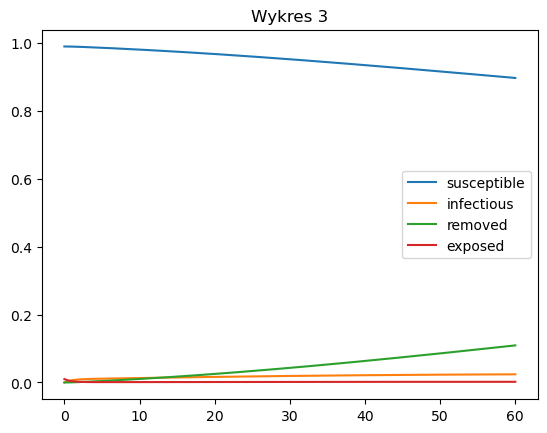

In [28]:

h = 0.001
beta = 0.09
sigma = 1 
gamma = 0.1

s = np.array([0.99])    #susceptible
e = np.array([0.01])    #exposed
i = np.array([0.0])     #infectious
r = np.array([0.0])     #removed

def ds(beta, s, i):
    return - beta * s * i 

def di(sigma, e, i, gamma):
    return sigma * e - (gamma * i)

def dr(gamma, i):
    return gamma * i

def de(beta, i, s, sigma, e):
    return beta * i * s - (sigma * e)


def s_rk(beta, s, i):
    f1 = h * ds(beta, s[-1], i[-1])
    f2 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f1)
    f3 = h * ds(beta, s[-1] + 1/2 * h, i[-1] + 1/2 * f2)
    f4 = h * ds(beta, s[-1] + h, i[-1] + f3)

    return s[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def i_rk(sigma, e, i, gamma):
    f1 = h * di(sigma, e[-1], i[-1], gamma)
    f2 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f1, gamma)
    f3 = h * di(sigma, e[-1] + 1/2 * h, i[-1] + 1/2 * f2, gamma)
    f4 = h * di(sigma, e[-1] + h, i[-1] + f3, gamma)

    return i[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def r_rk(gamma, i):
    f1 = h * dr(gamma, i[-1])
    f2 = h * dr(gamma, i[-1] + 1/2 * f1)
    f3 = h * dr(gamma, i[-1] + 1/2 * f2)
    f4 = h * dr(gamma, i[-1] + f3)

    return r[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


def e_rk(beta, i, s, sigma, e):
    f1 = h * de(beta, i[-1], s[-1], sigma, e[-1])
    f2 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f1, sigma, e[-1] + 1/2 * f1)
    f3 = h * de(beta, i[-1] + 1/2 * h, s[-1] + 1/2 * f2, sigma, e[-1] + 1/2 * f2)
    f4 = h * de(beta, i[-1] + h, s[-1] + f3, sigma, e[-1] + f3)

    return e[-1] + 1/6 * (f1 + 2*f2 + 2*f3 + f4)


#wykres
x = np.arange(0, 60, 0.001)

for z in x:
    ns, ni, nr, ne = s_rk(beta, s, i), i_rk(sigma, e, i, gamma), r_rk(gamma, i), e_rk(beta, i, s, sigma, e)

    s = np.append(s, ns)
    i = np.append(i, ni)
    r = np.append(r, nr)
    e = np.append(e, ne)


plt.plot(x, s[:-1], label = 'susceptible')
plt.plot(x, i[:-1], label = 'infectious')
plt.plot(x, r[:-1], label = 'removed')
plt.plot(x, e[:-1], label = 'exposed')
plt.title('Wykres 3')
plt.legend()
plt.show()

Gdy $R_0$ jest mniejszy od jeden, współczynnik zakażeń $\beta$ jest mniejszy od współczynnika ozdrowień $\gamma$ co uniemożliwia rozwój epidemii. (wykres 3)

Gdy $R_0$ jest większy od jeden, współczynnik zakażeń jest większy od współczynnika ozdrowień co przyspiesza rozwój epidemii. (wykres 2)